In [3]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

import cv2
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nnfl-assignment-i/test_data_file_id.csv
/kaggle/input/nnfl-assignment-i/train_mappings_final.csv
/kaggle/input/nnfl-assignment-i/final_train/final_train/230.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/9786.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/13498.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/6601.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/1675.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/5920.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/8021.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/5899.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/10048.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/12337.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/2409.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/12829.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/14395.jpg
/kaggle/input/nnfl-assignment-i/final_tr

/kaggle/input/nnfl-assignment-i/final_train/final_train/2615.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/9274.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/7637.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/9256.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/6511.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/16537.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/10398.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/4455.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/8289.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/757.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/13754.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/14013.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/6939.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/6345.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/13687.jpg
/kaggle/input/nnfl-as

/kaggle/input/nnfl-assignment-i/final_train/final_train/14992.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/12451.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/7531.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/16442.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/11222.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/572.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/2870.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/3819.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/8787.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/2638.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/16207.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/10840.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/2697.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/1714.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/3833.jpg
/kaggle/input/nnfl-a

/kaggle/input/nnfl-assignment-i/final_train/final_train/2961.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/8978.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/11726.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/6769.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/1184.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/12476.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/5810.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/15842.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/15362.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/6770.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/1875.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/4306.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/2142.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/14520.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/13996.jpg
/kaggle/input/nnfl-

/kaggle/input/nnfl-assignment-i/final_train/final_train/4657.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/1142.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/7358.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/12426.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/7688.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/4600.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/9339.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/6572.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/8335.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/1015.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/9396.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/1900.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/15148.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/3583.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/1788.jpg
/kaggle/input/nnfl-assi

/kaggle/input/nnfl-assignment-i/final_train/final_train/13494.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/13136.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/1361.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/7269.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/6217.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/14681.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/3596.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/5635.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/11027.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/2821.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/577.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/16377.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/16021.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/7193.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/10962.jpg
/kaggle/input/nnfl-

/kaggle/input/nnfl-assignment-i/final_train/final_train/10482.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/6385.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/15079.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/10254.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/1553.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/1212.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/7357.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/1456.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/12790.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/12411.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/4572.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/8651.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/12015.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/5108.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/5209.jpg
/kaggle/input/nnfl-

/kaggle/input/nnfl-assignment-i/final_train/final_train/13718.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/3764.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/9441.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/8131.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/15649.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/12588.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/6708.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/13209.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/3913.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/12863.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/1441.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/9309.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/4108.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/15336.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/14022.jpg
/kaggle/input/nnfl

/kaggle/input/nnfl-assignment-i/final_train/final_train/16455.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/12450.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/8172.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/6174.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/11771.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/889.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/5522.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/10193.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/8395.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/1864.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/10910.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/6892.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/16034.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/13584.jpg
/kaggle/input/nnfl-assignment-i/final_train/final_train/16432.jpg
/kaggle/input/nnfl

/kaggle/input/nnfl-assignment-i/final_test/final_test/230.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/1675.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/2409.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/3846.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/1220.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/1997.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/3923.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/2949.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/1247.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/697.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/4725.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/820.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/2511.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/238.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/4166.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/495.j

/kaggle/input/nnfl-assignment-i/final_test/final_test/709.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/3176.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/5068.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/3566.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/2530.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/3662.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/2614.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/3629.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/3625.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/2241.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/2388.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/3936.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/2620.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/3302.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/991.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/239

/kaggle/input/nnfl-assignment-i/final_test/final_test/3997.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/314.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/61.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/3982.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/959.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/5112.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/4244.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/4584.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/334.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/4434.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/2965.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/3023.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/743.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/2459.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/3727.jpg
/kaggle/input/nnfl-assignment-i/final_test/final_test/4767.jp

In [4]:
import os
import cv2
import csv
import matplotlib.pyplot as plt

class_x = []
train_x = []

train = open('../input/nnfl-assignment-i/train_mappings_final.csv')
csv_train = csv.reader(train)

ROWS = 128
COLS = 128
i = 0
for row in csv_train:
    if(i < 2):
        i = i+1
    else:
        if(row[1] == '0'):
            class_x.append(0)
        else:
            class_x.append(1)
        img = cv2.imread('../input/nnfl-assignment-i/final_train/final_train/'+ row[0][19:])
        img = cv2.resize(img , (ROWS,COLS) , interpolation=cv2.INTER_CUBIC)
        train_x.append(img)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, X_train_class, X_test_class = train_test_split(train_x, class_x, test_size=0.1)

In [6]:
#print(class_x)
X_train_class=np.array(X_train_class)
X_test_class=np.array(X_test_class)

In [7]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [8]:
print(X_train.shape)
print(X_train_class.shape)
print(X_test.shape)
print(X_test_class.shape)
print(X_train_class[0].dtype)
print(X_test_class[0].dtype)

(14917, 128, 128, 3)
(14917,)
(1658, 128, 128, 3)
(1658,)
int64
int64


In [9]:
print(X_train[44])
X_train = X_train/255.
X_test = X_test/255.

[[[251 251 251]
  [248 248 248]
  [247 247 247]
  ...
  [205 195 184]
  [202 192 182]
  [199 192 182]]

 [[251 251 251]
  [248 248 248]
  [246 246 246]
  ...
  [212 191 185]
  [213 191 185]
  [211 189 182]]

 [[252 252 252]
  [249 249 249]
  [246 246 246]
  ...
  [215 192 187]
  [213 188 184]
  [213 188 184]]

 ...

 [[ 24  99  88]
  [ 27 101  89]
  [ 20  90  78]
  ...
  [ 70  93 106]
  [ 40  64  76]
  [ 45  68  80]]

 [[ 30 100  88]
  [ 20  88  77]
  [ 20  86  75]
  ...
  [ 68  94 106]
  [ 72  96 108]
  [ 55  79  91]]

 [[ 40 106  95]
  [  6  70  60]
  [ 21  84  74]
  ...
  [ 70  98 109]
  [ 73  97 109]
  [ 52  76  88]]]


1


<function matplotlib.pyplot.show(*args, **kw)>

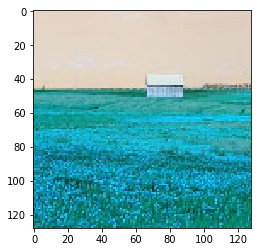

In [11]:
i = 2006
print(X_train_class[i])
plt.imshow(X_train[i])
plt.show

In [12]:
from keras.utils import np_utils

EPOCHS = 200
NUM_CLASSES = 2
BATCH_SIZE = 256

X_train_class = np_utils.to_categorical(X_train_class, dtype = 'int64')
X_test_class = np_utils.to_categorical(X_test_class, dtype = 'int64')

In [15]:
from keras.models import load_model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

input_shape = (128,128,3)
model=Sequential()

model = Sequential()
# Image size 64*64 
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
__________

In [16]:
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint

filepath=r"mod1.h5"

#model=load_model(r"mod1.h5")

import keras
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model.fit(X_train, X_train_class, validation_data=(X_test, X_test_class), epochs=200 ,batch_size=256, shuffle = True, callbacks=[checkpoint])

model.save(r"ang.h5")

Train on 14917 samples, validate on 1658 samples
Epoch 1/200
14917/14917 [==============================] - 11s 738us/step - loss: 0.7135 - acc: 0.7285 - val_loss: 0.8212 - val_acc: 0.7443

Epoch 00001: val_acc improved from -inf to 0.74427, saving model to mod1.h5
Epoch 2/200
14917/14917 [==============================] - 9s 590us/step - loss: 0.4260 - acc: 0.7464 - val_loss: 0.5081 - val_acc: 0.7443

Epoch 00002: val_acc did not improve from 0.74427
Epoch 3/200
14917/14917 [==============================] - 9s 596us/step - loss: 0.3464 - acc: 0.7466 - val_loss: 0.3987 - val_acc: 0.7443

Epoch 00003: val_acc did not improve from 0.74427
Epoch 4/200
14917/14917 [==============================] - 9s 614us/step - loss: 0.2903 - acc: 0.8713 - val_loss: 0.2368 - val_acc: 0.9481

Epoch 00004: val_acc improved from 0.74427 to 0.94813, saving model to mod1.h5
Epoch 5/200
14917/14917 [==============================] - 9s 605us/step - loss: 0.2676 - acc: 0.9462 - val_loss: 0.2243 - val_acc: 0.9

14917/14917 [==============================] - 9s 601us/step - loss: 0.1135 - acc: 0.9960 - val_loss: 0.2135 - val_acc: 0.9249

Epoch 00042: val_acc did not improve from 0.98824
Epoch 43/200
14917/14917 [==============================] - 9s 599us/step - loss: 0.1155 - acc: 0.9934 - val_loss: 0.1515 - val_acc: 0.9861

Epoch 00043: val_acc did not improve from 0.98824
Epoch 44/200
14917/14917 [==============================] - 9s 616us/step - loss: 0.1102 - acc: 0.9964 - val_loss: 0.1599 - val_acc: 0.9822

Epoch 00044: val_acc did not improve from 0.98824
Epoch 45/200
14917/14917 [==============================] - 9s 617us/step - loss: 0.1092 - acc: 0.9965 - val_loss: 0.1456 - val_acc: 0.9879

Epoch 00045: val_acc did not improve from 0.98824
Epoch 46/200
14917/14917 [==============================] - 9s 603us/step - loss: 0.1081 - acc: 0.9964 - val_loss: 0.1449 - val_acc: 0.9891

Epoch 00046: val_acc improved from 0.98824 to 0.98914, saving model to mod1.h5
Epoch 47/200
14917/14917 [===

14917/14917 [==============================] - 9s 622us/step - loss: 0.0806 - acc: 0.9993 - val_loss: 0.1378 - val_acc: 0.9879

Epoch 00084: val_acc did not improve from 0.99035
Epoch 85/200
14917/14917 [==============================] - 9s 601us/step - loss: 0.0802 - acc: 0.9994 - val_loss: 0.1404 - val_acc: 0.9888

Epoch 00085: val_acc did not improve from 0.99035
Epoch 86/200
14917/14917 [==============================] - 9s 597us/step - loss: 0.0796 - acc: 0.9994 - val_loss: 0.1382 - val_acc: 0.9891

Epoch 00086: val_acc did not improve from 0.99035
Epoch 87/200
14917/14917 [==============================] - 9s 602us/step - loss: 0.0791 - acc: 0.9994 - val_loss: 0.1412 - val_acc: 0.9885

Epoch 00087: val_acc did not improve from 0.99035
Epoch 88/200
14917/14917 [==============================] - 9s 599us/step - loss: 0.0793 - acc: 0.9989 - val_loss: 0.1397 - val_acc: 0.9888

Epoch 00088: val_acc did not improve from 0.99035
Epoch 89/200
14917/14917 [==============================] 

14917/14917 [==============================] - 9s 599us/step - loss: 0.0649 - acc: 0.9995 - val_loss: 0.1329 - val_acc: 0.9891

Epoch 00127: val_acc did not improve from 0.99035
Epoch 128/200
14917/14917 [==============================] - 9s 599us/step - loss: 0.0646 - acc: 0.9995 - val_loss: 0.1432 - val_acc: 0.9849

Epoch 00128: val_acc did not improve from 0.99035
Epoch 129/200
14917/14917 [==============================] - 9s 600us/step - loss: 0.0644 - acc: 0.9995 - val_loss: 0.1367 - val_acc: 0.9876

Epoch 00129: val_acc did not improve from 0.99035
Epoch 130/200
14917/14917 [==============================] - 9s 622us/step - loss: 0.0642 - acc: 0.9994 - val_loss: 0.1370 - val_acc: 0.9879

Epoch 00130: val_acc did not improve from 0.99035
Epoch 131/200
14917/14917 [==============================] - 9s 616us/step - loss: 0.0638 - acc: 0.9995 - val_loss: 0.1364 - val_acc: 0.9879

Epoch 00131: val_acc did not improve from 0.99035
Epoch 132/200
14917/14917 [===========================

14917/14917 [==============================] - 9s 617us/step - loss: 0.0550 - acc: 0.9995 - val_loss: 0.1342 - val_acc: 0.9870

Epoch 00170: val_acc did not improve from 0.99035
Epoch 171/200
14917/14917 [==============================] - 9s 619us/step - loss: 0.0547 - acc: 0.9995 - val_loss: 0.1371 - val_acc: 0.9864

Epoch 00171: val_acc did not improve from 0.99035
Epoch 172/200
14917/14917 [==============================] - 9s 602us/step - loss: 0.0546 - acc: 0.9995 - val_loss: 0.1425 - val_acc: 0.9852

Epoch 00172: val_acc did not improve from 0.99035
Epoch 173/200
14917/14917 [==============================] - 9s 604us/step - loss: 0.0545 - acc: 0.9995 - val_loss: 0.1413 - val_acc: 0.9843

Epoch 00173: val_acc did not improve from 0.99035
Epoch 174/200
14917/14917 [==============================] - 9s 603us/step - loss: 0.0543 - acc: 0.9995 - val_loss: 0.1383 - val_acc: 0.9849

Epoch 00174: val_acc did not improve from 0.99035
Epoch 175/200
14917/14917 [===========================

In [17]:
new=load_model(r"mod1.h5")
new.summary()

score = new.evaluate(x=X_test , y=X_test_class)
print(score[1]*100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
__________

In [36]:
test_t = []

test = open('../input/nnfl-assignment-i/test_data_file_id.csv')
csv_test = csv.reader(test)

ROWS = 128
COLS = 128
i = 1
for row in csv_test:
    if(i < 2):
        i = i+1
    else:
        img = cv2.imread('../input/nnfl-assignment-i/final_test/final_test/'+ row[1][18:])
        img = cv2.resize(img , (ROWS,COLS) , interpolation=cv2.INTER_CUBIC)
        test_t.append(img)

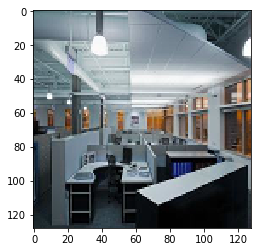

In [37]:
plt.imshow(test_t[2])
plt.show

test_t = np.array(test_t)

test_t = test_t/255.

pred = new.predict(test_t)

In [26]:
pred_labels = np.argmax(pred,axis=1)

./data/final_test/2.jpg


In [ ]:
sub = pd.DataFrame({  'Id' : range(2,5127) ,'Category' : pred_labels})

In [ ]:
print(sub[:50])

In [ ]:
sub.to_csv('exp1.csv', index = False)

In [ ]:
from IPython.display import HTML
import pandas as pd
import numpy as np
#df = pd.DataFrame(np.arange(1000), columns=['data'])

#df.to_csv('submission.csv')

def create_download_link(title = "Download CSV file", filename = "exp1.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='exp1.csv')